# PART 1

# Download dataset and Import Libraries

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "swapnilvishwakarma"
os.environ['KAGGLE_KEY'] = "38e76f67717501679b0aee4adb096c48"
!kaggle competitions download -c riiid-test-answer-prediction

  0% 0.00/445k [00:00<?, ?B/s]
100% 445k/445k [00:00<00:00, 64.3MB/s]
  0% 0.00/59.0 [00:00<?, ?B/s]
100% 59.0/59.0 [00:00<00:00, 140kB/s]
100% 1.29G/1.29G [00:16<00:00, 75.8MB/s]
100% 1.29G/1.29G [00:16<00:00, 83.8MB/s]
  0% 0.00/971 [00:00<?, ?B/s]
100% 971/971 [00:00<00:00, 915kB/s]
  0% 0.00/289k [00:00<?, ?B/s]
100% 289k/289k [00:00<00:00, 93.3MB/s]
  0% 0.00/9.48k [00:00<?, ?B/s]
100% 9.48k/9.48k [00:00<00:00, 9.22MB/s]
  0% 0.00/5.99k [00:00<?, ?B/s]
100% 5.99k/5.99k [00:00<00:00, 5.73MB/s]


In [2]:
from zipfile import ZipFile
file_name = "/content/train.csv.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
# !pip install dask[dataframe]
# !pip install modin[all]
# !pip install vaex
# !pip install -U ipykernel
# !pip install datatable

     |████████████████████████████████| 83.9MB 87kB/s 


In [4]:
import os
import time
import dask.dataframe as dd
import dask.array as da
import pandas as pd
import numpy as np
import datatable as dt

import warnings
warnings.filterwarnings(action="ignore")

# How to handle this big dataset?
* 1 - Deleting unused variables and gc.collect()
* 2 - Presetting the datatypes
* 3 - Importing selected rows of the a file (including generating your own subsamples)
* 4 - Importing in batches and processing each individually
* 5 - Importing just selected columns
* 6 - Creative data processing

In [5]:
## Presetting the datatypes
# If you import data into CSV, python will do it's best to guess the datatypes, but it will tend to error on the side of allocating more space than necessary.
# So if you know in advance that your numbers are integers, and don't get bigger than certain values, set the datatypes at minimum requirements before importing.

dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "boolean"
}

# Read Comparison

In [6]:
def read_time(method: str):
  """
  A function that return the amount of time taken for a particular library to read the csv file
  method: Pandas, Pandas_faster, Dask, Ray, Modin, Datatable
  """
  method = method.capitalize()

  if method == 'Pandas':
    s = time.time()
    df_pandas = pd.read_csv("/content/train.csv", dtype=dtypes)
    p_read = time.time() - s
    print(f'Pandas Reading time: {p_read} s')
    return df_pandas

  elif method == 'Pandas_faster':
    s = time.time()
    df_pandas_faster = pd.read_csv("/content/train.csv", dtype=dtypes, engine='c')
    p_read_fast = time.time() - s
    print(f'Pandas Reading time: {p_read_fast} s')
    return df_pandas_faster

  elif method == 'Dask':
    s = time.time()
    df_dask = dd.read_csv("/content/train.csv", dtype=dtypes) 
    d_read = time.time() - s
    print(f'Dask Reading time: {d_read} s')
    return df_dask

  elif method == 'Ray':
    os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
    import modin.pandas as modin_ray
    s = time.time()
    df_modin_ray = modin_ray.read_csv("/content/train.csv", dtype=dtypes)
    r_read = time.time() - s
    print(f'Ray Reading time: {r_read} s')
    return df_modin_ray

  elif method == 'Modin':
    # os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask
    import modin.pandas as md
    s = time.time()
    df_modin = md.read_csv("/content/train.csv", dtype=dtypes)
    m_read = time.time() - s
    print(f'Modin Reading time: {m_read} s')
    return df_modin

  elif method == 'Datatable':
    s = time.time()
    df_datable = dt.fread("/content/train.csv")
    dt_read = time.time() - s
    print(f'Datatable Reading time: {dt_read} s')
    return df_datable

  else:
    print('Please specify any lib from the following:\n1. Pandas\n2. Dask\n3. Ray\n 4. Modin\n5. Datatable\n6. Pandas_faster')


In [ ]:
df_pandas = read_time('pandas')

Pandas Reading time: 229.8334002494812 s


In [ ]:
df_pandas_faster = read_time('pandas_faster')

Pandas Reading time: 229.99737286567688 s


In [ ]:
df_dask = read_time('dask')

Dask Reading time: 0.1025397777557373 s


In [ ]:
df_modin_ray = read_time('ray')

(pid=4827) tcmalloc: large alloc 2923380736 bytes == 0x556d6daa2000 @  0x7f3bc74da1e7 0x556d6b2bbf48 0x556d6b2869c7 0x556d6b3683fe 0x556d6b289ee9 0x556d6b37b99d 0x556d6b2fdfe9 0x556d6b2f8b0e 0x556d6b1cae2b 0x556d6b2fb1e6 0x556d6b1cad14 0x7f3bc426b0ef 0x7f3bc4304756 0x7f3bc42730b3 0x7f3bc43c40c7 0x7f3bc43516a2 0x7f3bc43f88c8 0x7f3bc43540b2 0x7f3bc435210c 0x7f3bc48c1031 0x7f3bc48c1c89 0x7f3bc48c3fe7 0x7f3bc43d4718 0x7f3bc426e807 0x556d6b289f41 0x556d6b37b99d 0x556d6b2fdfe9 0x556d6b28b69a 0x556d6b2f9c9e 0x556d6b2f8b0e 0x556d6b2f8813
(pid=4826) tcmalloc: large alloc 2923380736 bytes == 0x5585314ac000 @  0x7f46485ee1e7 0x55852dffff48 0x55852dfca9c7 0x55852e0ac3fe 0x55852dfcdee9 0x55852e0bf99d 0x55852e041fe9 0x55852e03cb0e 0x55852df0ee2b 0x55852e03f1e6 0x55852df0ed14 0x7f464537f0ef 0x7f4645418756 0x7f46453870b3 0x7f46454d80c7 0x7f46454656a2 0x7f464550c8c8 0x7f46454680b2 0x7f464546610c 0x7f46459d5031 0x7f46459d5c89 0x7f46459d7fe7 0x7f46454e8718 0x7f4645382807 0x55852dfcdf41 0x55852e0bf99d 0x5

Ray Reading time: 313.34569215774536 s


In [ ]:
df_modin = read_time('modin')

(pid=6399) tcmalloc: large alloc 2923380736 bytes == 0x5569785c6000 @  0x7f40877071e7 0x556975d4af48 0x556975d159c7 0x556975df73fe 0x556975d18ee9 0x556975e0a99d 0x556975d8cfe9 0x556975d87b0e 0x556975c59e2b 0x556975d8a1e6 0x556975c59d14 0x7f40844980ef 0x7f4084531756 0x7f40844a00b3 0x7f40845f10c7 0x7f408457e6a2 0x7f40846258c8 0x7f40845810b2 0x7f408457f10c 0x7f4084aee031 0x7f4084aeec89 0x7f4084af0fe7 0x7f4084601718 0x7f408449b807 0x556975d18f41 0x556975e0a99d 0x556975d8cfe9 0x556975d1a69a 0x556975d88c9e 0x556975d87b0e 0x556975d87813
(pid=6400) tcmalloc: large alloc 2923380736 bytes == 0x559efacbe000 @  0x7fc7a7ac01e7 0x559ef6a93f48 0x559ef6a5e9c7 0x559ef6b403fe 0x559ef6a61ee9 0x559ef6b5399d 0x559ef6ad5fe9 0x559ef6ad0b0e 0x559ef69a2e2b 0x559ef6ad31e6 0x559ef69a2d14 0x7fc7a48510ef 0x7fc7a48ea756 0x7fc7a48590b3 0x7fc7a49aa0c7 0x7fc7a49376a2 0x7fc7a49de8c8 0x7fc7a493a0b2 0x7fc7a493810c 0x7fc7a4ea7031 0x7fc7a4ea7c89 0x7fc7a4ea9fe7 0x7fc7a49ba718 0x7fc7a4854807 0x559ef6a61f41 0x559ef6b5399d 0x5

Modin Reading time: 340.67354941368103 s


In [7]:
df_datable = read_time('datatable')

Datatable Reading time: 107.53213763237 s


Text(0.5, 1.0, 'Reading Time Comparison')

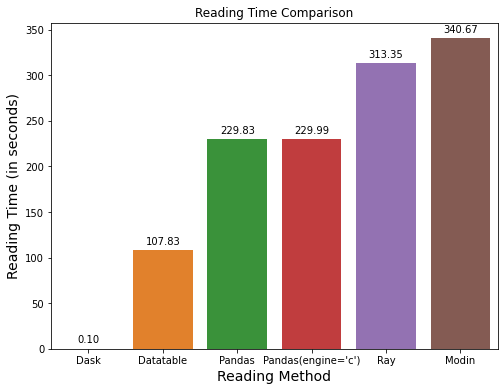

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

reading_time = [229.833, 229.99, 0.102, 313.345, 340.673, 107.832]
reading_method = ['Pandas', "Pandas(engine='c')", 'Dask', 'Ray', 'Modin', 'Datatable']
df_read = pd.DataFrame({"Reading_Time": reading_time, "Reading_Method": reading_method})

plt.figure(figsize=(8, 6))
splot = sns.barplot(x="Reading_Method", y="Reading_Time", data = df_read, order=df_read.sort_values('Reading_Time').Reading_Method)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Reading Method", size=14)
plt.ylabel("Reading Time (in seconds)", size=14)
plt.title('Reading Time Comparison')

### From the above figure it is clear that Dask is the fastest whereas normal Modin is the slowest to perform read operation!!!

# Various Operations

## Checking initial values

In [ ]:
%%time
df_pandas.head()

CPU times: user 672 µs, sys: 0 ns, total: 672 µs
Wall time: 668 µs


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,<NA>
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


In [ ]:
%%time
df_dask.head()

CPU times: user 2.55 s, sys: 117 ms, total: 2.67 s
Wall time: 3.74 s


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,<NA>
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


In [ ]:
%%time
df_modin_ray.head()

CPU times: user 3.3 ms, sys: 388 µs, total: 3.69 ms
Wall time: 8.82 ms


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,<NA>
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


In [ ]:
%%time
df_modin.head()

CPU times: user 4.27 ms, sys: 42 µs, total: 4.31 ms
Wall time: 12.1 ms


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,<NA>
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


In [ ]:
%%time
df_datable.head()

CPU times: user 0 ns, sys: 592 µs, total: 592 µs
Wall time: 7.72 ms
   | row_id  timestamp  user_id  content_id  content_type_id  task_container_id  user_answer  answered_correctly    pr…  …
-- + ------  ---------  -------  ----------  ---------------  -----------------  -----------  ------------------  -----   
 0 |      0          0      115        5692                0                  1            3                   1     NA  …
 1 |      1      56943      115        5716                0                  2            2                   1  37000  …
 2 |      2     118363      115         128                0                  0            0                   1  55000  …
 3 |      3     131167      115        7860                0                  3            0                   1  19000  …
 4 |      4     137965      115        7922                0                  4            1                   1  11000  …
 5 |      5     157063      115         156                0           

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪
0,0,0,115,5692,0,1,3,1,NA,NA
1,1,56943,115,5716,0,2,2,1,37000,0
2,2,118363,115,128,0,0,0,1,55000,0
3,3,131167,115,7860,0,3,0,1,19000,0
4,4,137965,115,7922,0,4,1,1,11000,0
5,5,157063,115,156,0,5,2,1,5000,0
6,6,176092,115,51,0,6,0,1,17000,0
7,7,194190,115,50,0,7,3,1,17000,0
8,8,212463,115,7896,0,8,2,1,16000,0


## After reading the file as a datatable, it can be converted into pandas dataframe easily for further analysis and manipulation!

## Conversion can be achieved as follows:
## dt_to_pandas = df_datatable.to_pandas()

## Pandas is the faster to check few initial values as the dataframe is stored in RAM hence it is very quick to access!

## Checking dtypes

In [ ]:
%%time
df_pandas.dtypes

CPU times: user 574 µs, sys: 35 µs, total: 609 µs
Wall time: 619 µs


row_id                              int64
timestamp                           int64
user_id                             int32
content_id                          int16
content_type_id                   boolean
task_container_id                   int16
user_answer                          int8
answered_correctly                   int8
prior_question_elapsed_time       float32
prior_question_had_explanation    boolean
dtype: object

In [ ]:
%%time
df_dask.dtypes

CPU times: user 496 µs, sys: 0 ns, total: 496 µs
Wall time: 507 µs


row_id                              int64
timestamp                           int64
user_id                             int32
content_id                          int16
content_type_id                   boolean
task_container_id                   int16
user_answer                          int8
answered_correctly                   int8
prior_question_elapsed_time       float32
prior_question_had_explanation    boolean
dtype: object

In [ ]:
%%time
df_modin_ray.dtypes

CPU times: user 44 µs, sys: 0 ns, total: 44 µs
Wall time: 48.6 µs


row_id                              int64
timestamp                           int64
user_id                             int32
content_id                          int16
content_type_id                   boolean
task_container_id                   int16
user_answer                          int8
answered_correctly                   int8
prior_question_elapsed_time       float32
prior_question_had_explanation    boolean
dtype: object

In [ ]:
%%time
df_modin.dtypes

CPU times: user 17 µs, sys: 6 µs, total: 23 µs
Wall time: 26 µs


row_id                              int64
timestamp                           int64
user_id                             int32
content_id                          int16
content_type_id                   boolean
task_container_id                   int16
user_answer                          int8
answered_correctly                   int8
prior_question_elapsed_time       float32
prior_question_had_explanation    boolean
dtype: object

In [12]:
%%time
df_datable.stypes

CPU times: user 122 µs, sys: 24 µs, total: 146 µs
Wall time: 169 µs


(stype.int32,
 stype.int64,
 stype.int32,
 stype.int32,
 stype.bool8,
 stype.int32,
 stype.int32,
 stype.int32,
 stype.float64,
 stype.bool8)

## Modin is the fastest to check the datatypes of each columns!

## Describe

In [ ]:
%%time
df_pandas.describe()

CPU times: user 17.9 s, sys: 3.12 s, total: 21 s
Wall time: 21 s


,row_id,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,9.040624e+02,1.376123e+00,6.251644e-01,1.300508e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.358302e+03,1.192896e+00,5.225307e-01,2.122839e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [ ]:
%%time
df_dask.describe().compute()

CPU times: user 5min 10s, sys: 7.8 s, total: 5min 17s
Wall time: 5min 27s


,row_id,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,3.319773e+07,6.838659e+08,7.113886e+08,2.196000e+03,1.240000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,6.714752e+07,3.620885e+09,1.427710e+09,5.190000e+03,4.790000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,1.011347e+08,1.265219e+10,2.145836e+09,7.713000e+03,1.498000e+03,3.000000e+00,1.000000e+00,3.050000e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [ ]:
%%time
df_modin_ray.describe()

(pid=4827) tcmalloc: large alloc 1619689472 bytes == 0x556e86e76000 @  0x7f3bc74da1e7 0x7f3bc0ac946e 0x7f3bc0b19c7b 0x7f3bc0b19d18 0x7f3bc0bc1010 0x7f3bc0bc173c 0x7f3bc0bc185d 0x556d6b28c2f8 0x7f3bc0b06ef7 0x556d6b289fd7 0x556d6b289de0 0x556d6b2fdac2 0x556d6b2f8b0e 0x556d6b28b77a 0x556d6b2fa86a 0x556d6b2f8e0d 0x556d6b28b77a 0x556d6b2fa86a 0x556d6b2f8b0e 0x556d6b28b77a 0x556d6b2fa86a 0x556d6b28b69a 0x556d6b2f9c9e 0x556d6b2f8b0e 0x556d6b28b77a 0x556d6b2fa86a 0x556d6b2f8b0e 0x556d6b28be11 0x556d6b28c231 0x556d6b2fb1e6 0x556d6b2f8e0d
(pid=4827) tcmalloc: large alloc 1619689472 bytes == 0x556d9def6000 @  0x7f3bc74da1e7 0x7f3bc0ac946e 0x7f3bc0b19c7b 0x7f3bc0b1a35f 0x7f3bc0bbc103 0x556d6b28a0e4 0x556d6b289de0 0x556d6b2fe6f5 0x556d6b2f8b0e 0x556d6b28b77a 0x556d6b2fa86a 0x556d6b2f8b0e 0x556d6b28b77a 0x556d6b2fa86a 0x556d6b2f8e0d 0x556d6b28b77a 0x556d6b2fa86a 0x556d6b2f8e0d 0x556d6b28b77a 0x556d6b2fa86a 0x556d6b2f8b0e 0x556d6b28b77a 0x556d6b2fa86a 0x556d6b2f8b0e 0x556d6b28b77a 0x556d6b2fa86a 0x5

CPU times: user 2.48 s, sys: 487 ms, total: 2.97 s
Wall time: 1min 17s


,row_id,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,9.040624e+02,1.376123e+00,6.251644e-01,1.300508e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.358302e+03,1.192896e+00,5.225307e-01,2.122839e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [ ]:
%%time
df_modin.describe()

(pid=6399) tcmalloc: large alloc 1619689472 bytes == 0x556a91994000 @  0x7f40877071e7 0x7f4080cf646e 0x7f4080d46c7b 0x7f4080d46d18 0x7f4080dee010 0x7f4080dee73c 0x7f4080dee85d 0x556975d1b2f8 0x7f4080d33ef7 0x556975d18fd7 0x556975d18de0 0x556975d8cac2 0x556975d87b0e 0x556975d1a77a 0x556975d8986a 0x556975d87e0d 0x556975d1a77a 0x556975d8986a 0x556975d87b0e 0x556975d1a77a 0x556975d8986a 0x556975d1a69a 0x556975d88c9e 0x556975d87b0e 0x556975d1a77a 0x556975d8986a 0x556975d87b0e 0x556975d1ae11 0x556975d1b231 0x556975d8a1e6 0x556975d87e0d
(pid=6399) tcmalloc: large alloc 1619689472 bytes == 0x5569a8a1a000 @  0x7f40877071e7 0x7f4080cf646e 0x7f4080d46c7b 0x7f4080d4735f 0x7f4080de9103 0x556975d190e4 0x556975d18de0 0x556975d8d6f5 0x556975d87b0e 0x556975d1a77a 0x556975d8986a 0x556975d87b0e 0x556975d1a77a 0x556975d8986a 0x556975d87e0d 0x556975d1a77a 0x556975d8986a 0x556975d87e0d 0x556975d1a77a 0x556975d8986a 0x556975d87b0e 0x556975d1a77a 0x556975d8986a 0x556975d87b0e 0x556975d1a77a 0x556975d8986a 0x5

CPU times: user 2.46 s, sys: 480 ms, total: 2.94 s
Wall time: 1min 16s


,row_id,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,9.040624e+02,1.376123e+00,6.251644e-01,1.300508e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.358302e+03,1.192896e+00,5.225307e-01,2.122839e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [13]:
%%time
# df_datable.describe()
# summary(df_datable)
df_datable.sum()

CPU times: user 16.3 s, sys: 14.3 ms, total: 16.4 s
Wall time: 8.28 s
   |      row_id    timestamp      user_id   content_id  content_type_id  task_container_id  user_answer  answered_c…  …
-- + -----------  -----------  -----------  -----------  ---------------  -----------------  -----------  -----------   
 0 | 5.12379e+15  7.79842e+17  1.08998e+17  5.28382e+11      1.95903e+06        9.15185e+10  1.39305e+08  6.32856e+07  …

[1 row x 10 columns]


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,5.12379e+15,7.79842e+17,1.08998e+17,5.28382e+11,1.95903e+06,9.15185e+10,1.39305e+08,6.32856e+07,2.51388e+12,8.96856e+07


In [14]:
%%time
df_datable.max()

CPU times: user 64 µs, sys: 10 µs, total: 74 µs
Wall time: 78.4 µs
   |    row_id    timestamp     user_id  content_id  content_type_id  task_container_id  user_answer  answered_corre…  …
-- + ---------  -----------  ----------  ----------  ---------------  -----------------  -----------  ---------------   
 0 | 101230331  87425772049  2147482888       32736                1               9999            3                1  …

[1 row x 10 columns]


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪
0,101230331,87425772049,2147482888,32736,1,9999,3,1,300000,1


In [15]:
%%time
df_datable.min()

CPU times: user 62 µs, sys: 0 ns, total: 62 µs
Wall time: 67.5 µs
   | row_id  timestamp  user_id  content_id  content_type_id  task_container_id  user_answer  answered_correctly  pr…  …
-- + ------  ---------  -------  ----------  ---------------  -----------------  -----------  ------------------  ---   
 0 |      0          0      115           0                0                  0           -1                  -1    0  …

[1 row x 10 columns]


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪
0,0,0,115,0,0,0,−1,−1,0,0


In [16]:
%%time
df_datable.mean()

CPU times: user 32 µs, sys: 5 µs, total: 37 µs
Wall time: 42 µs
   |      row_id    timestamp      user_id  content_id  content_type_id  task_container_id  user_answer  answered_co…  …
-- + -----------  -----------  -----------  ----------  ---------------  -----------------  -----------  ------------   
 0 | 5.06152e+07  7.70364e+09  1.07673e+09      5219.6        0.0193522            904.062      1.37612      0.625164  …

[1 row x 10 columns]


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,5.06152e+07,7.70364e+09,1.07673e+09,5219.6,0.0193522,904.062,1.37612,0.625164,25423.8,0.889404


In [17]:
%%time
df_datable.sd()

CPU times: user 31 µs, sys: 5 µs, total: 36 µs
Wall time: 38.9 µs
   |      row_id    timestamp      user_id  content_id  content_type_id  task_container_id  user_answer  answered_co…  …
-- + -----------  -----------  -----------  ----------  ---------------  -----------------  -----------  ------------   
 0 | 2.92227e+07  1.15927e+10  6.19716e+08     3866.36          0.13776             1358.3       1.1929      0.522531  …

[1 row x 10 columns]


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,2.92227e+07,1.15927e+10,6.19716e+08,3866.36,0.13776,1358.3,1.1929,0.522531,19948.1,0.313631


In [18]:
%%time
df_datable.mode()

CPU times: user 50.9 s, sys: 9.38 s, total: 1min
Wall time: 33.2 s
   | row_id  timestamp    user_id  content_id  content_type_id  task_container_id  user_answer  answered_correctly  …
-- + ------  ---------  ---------  ----------  ---------------  -----------------  -----------  ------------------   
 0 |      0          0  801103753        6116                0                 14            0                   1  …

[1 row x 10 columns]


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪
0,0,0,801103753,6116,0,14,0,1,17000,1


In [19]:
%%time
df_datable.nmodal()

CPU times: user 188 µs, sys: 7 µs, total: 195 µs
Wall time: 199 µs
   | row_id  timestamp  user_id  content_id  content_type_id  task_container_id  user_answer  answered_correctly      pr…  …
-- + ------  ---------  -------  ----------  ---------------  -----------------  -----------  ------------------  -------   
 0 |      1     396417    17917      213605         99271300             804285     28186489            65244627  5154588  …

[1 row x 10 columns]


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,1,396417,17917,213605,99271300,804285,28186489,65244627,5154588,89685560


In [20]:
%%time
df_datable.nunique()

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 39.1 µs
   |    row_id  timestamp  user_id  content_id  content_type_id  task_container_id  user_answer  answered_correctly  …
-- + ---------  ---------  -------  ----------  ---------------  -----------------  -----------  ------------------   
 0 | 101230332   72821015   393656       13782                2              10000            5                   3  …

[1 row x 10 columns]


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,101230332,72821015,393656,13782,2,10000,5,3,3258,2


## Pandas is the fastest to get the statistical values of the columns!

## Value Counts

In [ ]:
%%time
df_pandas['answered_correctly'].value_counts()

CPU times: user 910 ms, sys: 32.9 ms, total: 943 ms
Wall time: 947 ms


 1    65244627
 0    34026673
-1     1959032
Name: answered_correctly, dtype: int64

In [ ]:
%%time
df_dask['answered_correctly'].value_counts().compute()

CPU times: user 4min 18s, sys: 5.93 s, total: 4min 24s
Wall time: 3min 51s


 1    65244627
 0    34026673
-1     1959032
Name: answered_correctly, dtype: int64

In [ ]:
%%time
df_modin_ray['answered_correctly'].value_counts()

CPU times: user 1.12 s, sys: 688 ms, total: 1.81 s
Wall time: 5.38 s


 1    65244627
 0    34026673
-1     1959032
Name: answered_correctly, dtype: int64

In [ ]:
%%time
df_modin['answered_correctly'].value_counts()

CPU times: user 1.1 s, sys: 721 ms, total: 1.82 s
Wall time: 5.35 s


 1    65244627
 0    34026673
-1     1959032
Name: answered_correctly, dtype: int64

## Pandas is the faster to get the count of unique values in a column!

## No. of null values

In [ ]:
%%time
df_pandas.isna().sum()

CPU times: user 1.39 s, sys: 8.61 ms, total: 1.4 s
Wall time: 1.4 s


row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

In [ ]:
%%time
df_dask.isna().sum(axis=0).compute()

CPU times: user 4min 35s, sys: 5.72 s, total: 4min 40s
Wall time: 3min 34s


row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

In [ ]:
%%time
df_modin_ray.isna().sum()

CPU times: user 853 ms, sys: 533 ms, total: 1.39 s
Wall time: 28.9 s


row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

In [ ]:
%%time
df_modin.isna().sum()

CPU times: user 936 ms, sys: 669 ms, total: 1.6 s
Wall time: 29.2 s


row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

## Pandas is the fastest to check the null values count!

## Drop rows containing null values

In [ ]:
%%time
df_pandas.dropna(subset=['prior_question_elapsed_time', 'prior_question_had_explanation'])

CPU times: user 6.38 s, sys: 3.51 s, total: 9.88 s
Wall time: 9.87 s


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False
5,5,157063,115,156,False,5,2,1,5000.0,False
...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,False,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,False,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,False,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,False,25,1,0,22000.0,True


In [ ]:
%%time
df_dask.dropna(subset=['prior_question_elapsed_time', 'prior_question_had_explanation']).compute()

CPU times: user 4min 47s, sys: 14.8 s, total: 5min 2s
Wall time: 3min 49s


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False
5,5,157063,115,156,False,5,2,1,5000.0,False
...,...,...,...,...,...,...,...,...,...,...
382399,101230327,428564420,2147482888,3586,False,22,0,1,18000.0,True
382400,101230328,428585000,2147482888,6341,False,23,3,1,14000.0,True
382401,101230329,428613475,2147482888,4212,False,24,3,1,14000.0,True
382402,101230330,428649406,2147482888,6343,False,25,1,0,22000.0,True


In [ ]:
%%time
df_modin_ray.dropna(subset=['prior_question_elapsed_time', 'prior_question_had_explanation'])

CPU times: user 3.44 s, sys: 1.4 s, total: 4.83 s
Wall time: 1min 46s


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False
5,5,157063,115,156,False,5,2,1,5000.0,False
...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,False,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,False,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,False,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,False,25,1,0,22000.0,True


In [ ]:
%%time
df_modin.dropna(subset=['prior_question_elapsed_time', 'prior_question_had_explanation'])

CPU times: user 3.7 s, sys: 1.52 s, total: 5.22 s
Wall time: 1min 50s


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False
5,5,157063,115,156,False,5,2,1,5000.0,False
...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,False,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,False,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,False,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,False,25,1,0,22000.0,True


## Pandas is the fastest to drop the rows containing null values!

## Drop columns

In [ ]:
%%time
df_pandas.drop(['row_id', 'timestamp'], axis=1, inplace=True)

CPU times: user 753 ms, sys: 112 ms, total: 865 ms
Wall time: 870 ms


In [ ]:
%%time
df_dask.drop(['row_id', 'timestamp'], axis=1).compute()

CPU times: user 4min 20s, sys: 9.32 s, total: 4min 29s
Wall time: 3min 54s


,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,115,5692,False,1,3,1,NaN,<NA>
1,115,5716,False,2,2,1,37000.0,False
2,115,128,False,0,0,1,55000.0,False
3,115,7860,False,3,0,1,19000.0,False
4,115,7922,False,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...
382399,2147482888,3586,False,22,0,1,18000.0,True
382400,2147482888,6341,False,23,3,1,14000.0,True
382401,2147482888,4212,False,24,3,1,14000.0,True
382402,2147482888,6343,False,25,1,0,22000.0,True


In [ ]:
%%time
df_modin_ray.drop(['row_id', 'timestamp'], axis=1, inplace=True)

CPU times: user 2.4 ms, sys: 1.16 ms, total: 3.56 ms
Wall time: 3.47 ms


In [ ]:
%%time
df_modin.drop(['row_id', 'timestamp'], axis=1, inplace=True)

CPU times: user 2.4 ms, sys: 120 µs, total: 2.52 ms
Wall time: 2.32 ms


## Modin is the fastest to drop columns!

## Replace _ with white space

In [ ]:
%%time
df_pandas.columns = df_pandas.columns.str.replace('_', ' ')

CPU times: user 610 µs, sys: 50 µs, total: 660 µs
Wall time: 632 µs


In [ ]:
%%time
df_dask.columns = df_dask.columns.str.replace('_', ' ')

CPU times: user 4.52 ms, sys: 0 ns, total: 4.52 ms
Wall time: 7.62 ms


In [ ]:
%%time
df_modin_ray.columns = df_modin_ray.columns.str.replace('_', ' ')

CPU times: user 2.37 ms, sys: 95 µs, total: 2.46 ms
Wall time: 2.91 ms


In [ ]:
%%time
df_modin.columns = df_modin.columns.str.replace('_', ' ')

CPU times: user 2.49 ms, sys: 0 ns, total: 2.49 ms
Wall time: 7.41 ms


## Pandas is the fastest to manipulate column names!

# PART 2

# Data Ingestion

In [ ]:
%%writefile testutility.py
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime 
import gc
import re


################
# File Reading #
################

def read_config_file(filepath):
    with open(filepath, 'r') as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            logging.error(exc)


def replacer(string, char):
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string) 
    return string

def col_header_val(df, table_config):
    cols = df.columns
    cols = cols.str.strip()
    cols.str.replace(" ", "_")
    expected_col = list(map(lambda x: x.lower(),  config_data['columns']))
    cols = list(cols.sort_values())
    expected_col.sort()
    if len(cols) == len(expected_col) and cols == expected_col:
      print("Column name and Column length Validation Passed!!")
      return 1
    else:
      print("Column name and Column length Validation Failed..")
      mismatched_columns_file = list(set(cols).difference(expected_col))
      print("Following File columns are not in the YAML file", mismatched_columns_file)
      missing_YAML_file = list(set(expected_col).difference(cols))
      print("Following YAML columns are not in the file uploaded", missing_YAML_file)
      logging.info(f'df columns: {cols}')
      logging.info(f'expected columns: {expected_col}')
      return 0

def humanbytes(B):
   'Return the given bytes as a human friendly KB, MB, GB, or TB string'
   B = float(B)
   KB = float(1024)
   MB = float(KB ** 2) # 1,048,576
   GB = float(KB ** 3) # 1,073,741,824
   TB = float(KB ** 4) # 1,099,511,627,776

   if B < KB:
      return '{0} {1}'.format(B,'Bytes' if 0 == B > 1 else 'Byte')
   elif KB <= B < MB:
      return '{0:.2f} KB'.format(B/KB)
   elif MB <= B < GB:
      return '{0:.2f} MB'.format(B/MB)
   elif GB <= B < TB:
      return '{0:.2f} GB'.format(B/GB)
   elif TB <= B:
      return '{0:.2f} TB'.format(B/TB)

def stats(df, config_data):
  if col_header_val(df, config_data) == 1:
    col_names = list(df.columns)
    no_of_cols = df.shape[1]
    no_of_rows = df.shape[0]
    size = df.memory_usage(deep=True).sum()
    file_size = humanbytes(size)
    statistics = f"\nNo. of Columns: {no_of_cols} \nNo. of Rows: {no_of_rows} \nColumn Names: {col_names} \nFile Size: {file_size}"
    print(statistics)

def save_gz(df):
  df.to_csv('compressed_train.gz', sep='|', compression='gzip')
  print("File saved in gz format with pipe separator")

Overwriting testutility.py


# Writing YAML File

In [ ]:
%%writefile file.yaml
columns: 
  - row_id
  - timestamp
  - user_id
  - content_id
  - content_type_id
  - task_container_id
  - user_answer
  - answered_correctly
  - prior_question_elapsed_time
  - prior_question_had_explanation
dataset_name: trainfile
dtypes: 
  answered_correctly: int8
  content_id: int16
  content_type_id: boolean
  prior_question_elapsed_time: float32
  prior_question_had_explanation: boolean
  row_id: int64
  task_container_id: int16
  timestamp: int64
  user_answer: int8
  user_id: int32
file_name: train
file_type: csv
inbound_delimiter: ","
outbound_delimiter: "|"
skip_leading_rows: 1
table_name: edsurv

Overwriting file.yaml


In [ ]:
# Read config file
import testutility as util
config_data = util.read_config_file("file.yaml")

In [ ]:
#inspecting data of config file
config_data

{'columns': ['row_id',
  'timestamp',
  'user_id',
  'content_id',
  'content_type_id',
  'task_container_id',
  'user_answer',
  'answered_correctly',
  'prior_question_elapsed_time',
  'prior_question_had_explanation'],
 'dataset_name': 'trainfile',
 'dtypes': {'answered_correctly': 'int8',
  'content_id': 'int16',
  'content_type_id': 'boolean',
  'prior_question_elapsed_time': 'float32',
  'prior_question_had_explanation': 'boolean',
  'row_id': 'int64',
  'task_container_id': 'int16',
  'timestamp': 'int64',
  'user_answer': 'int8',
  'user_id': 'int32'},
 'file_name': 'train',
 'file_type': 'csv',
 'inbound_delimiter': ',',
 'outbound_delimiter': '|',
 'skip_leading_rows': 1,
 'table_name': 'edsurv'}

In [ ]:
import pandas as pd
# read the file using config file
file_type = config_data['file_type']
source_file = config_data['file_name'] + f'.{file_type}'
datatypes = config_data['dtypes']
#print("",source_file)
df = pd.read_csv(source_file, delimiter=config_data['inbound_delimiter'], dtype=datatypes)
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,<NA>
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


In [ ]:
from testutility import  col_header_val, stats, save_gz

In [ ]:
if col_header_val(df, config_data) == 0:
    print("Validation Failed!!")
else:
    print("Column Validation Passed..")

Column name and Column length Validation Passed!!
Column Validation Passed..


In [ ]:
def stats(df, config_data):
  if col_header_val(df, config_data) == 1:
    col_names = list(df.columns)
    no_of_cols = df.shape[1]
    no_of_rows = df.shape[0]
    size = df.memory_usage(deep=True).sum()
    file_size = humanbytes(size)
    statistics = f"\nNo. of Columns: {no_of_cols} \nNo. of Rows: {no_of_rows} \nColumn Names: {col_names} \nFile Size: {file_size}"
    print(statistics)

In [ ]:
stats(df, config_data)

Column name and Column length Validation Passed!!

No. of Columns: 10 
No. of Rows: 101230332 
Column Names: ['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time', 'prior_question_had_explanation'] 
File Size: 3.21 GB


In [ ]:
save_gz(df)

File saved in gz format with pipe separator
